In [1]:
import os.path
import sys
current_path = os.path.abspath(os.getcwd())
parent_path = os.path.dirname(current_path)
sys.path.insert(0, parent_path)
import tensorflow as tf
from data_cleaning import data_cleaner
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
print(tf.__version__)

2.7.0


In [2]:
train_file = '/Users/crameshb/Documents/neural_nets/Housing_Prices/data/train.csv'
test_file = '/Users/crameshb/Documents/neural_nets/Housing_Prices/data/test.csv'
X,y,X_test = data_cleaner.data_cleaner(train_file,test_file)

In [3]:
print(' X_train shape is {0} \n y_train shape is {1} \n X_test shape is {2}'.format(X.shape,
                                                                                    y.shape,
                                                                                    X_test.shape,
                                                                                    ))

 X_train shape is (1460, 79) 
 y_train shape is (1460,) 
 X_test shape is (1459, 80)


In [4]:
def randomize(x, y):
    """ Randomizes the order of data samples and their corresponding labels"""
    permutation = np.random.permutation(y.shape[0])
    shuffled_x = x[permutation, :]
    shuffled_y = y[permutation]
    return shuffled_x, shuffled_y

In [5]:
def get_next_batch(x, y, start, end):
    x_batch = x[start:end]
    y_batch = y[start:end]
    return x_batch, y_batch

In [6]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42,shuffle = True)

In [7]:
X_train.shape , X_val.shape

((1168, 79), (292, 79))

In [8]:
X_train.tail()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1095,0.0,3.0,49.0,456.0,1.0,0.0,0.0,3.0,0.0,4.0,...,0.0,0.0,1.0,2.0,2.0,0.0,2.0,1.0,8.0,4.0
1130,4.0,3.0,36.0,254.0,1.0,0.0,3.0,3.0,0.0,4.0,...,0.0,0.0,1.0,2.0,2.0,0.0,11.0,3.0,8.0,4.0
1294,0.0,3.0,31.0,296.0,1.0,0.0,3.0,3.0,0.0,4.0,...,0.0,0.0,1.0,2.0,2.0,0.0,3.0,0.0,8.0,4.0
860,4.0,3.0,26.0,239.0,1.0,0.0,3.0,3.0,0.0,0.0,...,0.0,0.0,1.0,0.0,2.0,0.0,5.0,1.0,8.0,4.0
1126,11.0,3.0,24.0,53.0,1.0,0.0,3.0,3.0,0.0,4.0,...,0.0,0.0,1.0,2.0,2.0,0.0,5.0,3.0,8.0,4.0


In [9]:
X_train.describe().transpose()[['mean', 'std']]

,mean,std
MSSubClass,4.154966,4.163636
MSZoning,3.033390,0.609619
LotFrontage,40.688356,18.757108
LotArea,499.527397,300.056751
Street,0.996575,0.058445
...,...,...
MiscVal,0.327911,1.946017
MoSold,5.356164,2.670707
YrSold,1.818493,1.322639
SaleType,7.497432,1.587762


In [11]:
normalizer = tf.keras.layers.Normalization(axis=1)

In [12]:
normalizer.adapt(np.array(X_train))

2021-11-27 13:07:34.027631: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
print(normalizer.mean.numpy())

[[4.1549649e+00 3.0333905e+00 4.0688343e+01 4.9952737e+02 9.9657536e-01
  2.5684932e-02 1.9178078e+00 2.7945204e+00 8.5616438e-04 2.9597604e+00
  5.9075344e-02 1.2238010e+01 2.0282536e+00 2.0085616e+00 4.7859594e-01
  3.0505140e+00 5.1215749e+00 4.5847611e+00 7.2715729e+01 3.4897270e+01
  1.4203764e+00 1.0676370e+00 9.6746569e+00 1.0455478e+01 1.7551368e+00
  5.8835617e+01 2.5410957e+00 3.7183223e+00 1.4032533e+00 2.2551367e+00
  2.8047941e+00 2.2945206e+00 2.7071917e+00 2.0460271e+02 4.7251716e+00
  7.7191777e+00 3.2506247e+02 3.0345551e+02 1.0410956e+00 1.5607876e+00
  9.2893833e-01 3.6969182e+00 3.3392120e+02 8.6357010e+01 1.9520545e-01
  3.9071573e+02 4.2551360e-01 5.7363003e-02 1.5770547e+00 3.8184926e-01
  2.8895550e+00 1.0479449e+00 2.3450344e+00 4.5607882e+00 5.7431512e+00
  6.1815071e-01 2.3861296e+00 2.2080483e+00 6.4968315e+01 1.1669520e+00
  1.7816783e+00 1.7068234e+02 3.8732872e+00 3.9041095e+00 1.8535960e+00
  5.4856163e+01 3.7744865e+01 8.1883535e+00 1.7808220e-01 2.9015

In [15]:
first = np.array(X_train[:1])
with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[  0.   3.  41. 320.   1.   0.   3.   3.   0.   4.   0.  12.   2.   2.
    0.   2.   4.   5.  58.   7.   1.   1.   8.   8.   2.   0.   3.   2.
    1.   3.   3.   3.   4. 464.   5.   0. 245. 471.   1.   4.   1.   4.
  458.   0.   0. 287.   1.   0.   1.   0.   3.   1.   3.   3.   6.   0.
    2.   1.  43.   1.   1.  46.   4.   4.   2. 160.   0.   0.   0.   0.
    0.   1.   2.   2.   0.   5.   4.   8.   4.]]

Normalized: [[-1.   -0.05  0.02 -0.6   0.06 -0.16  0.77  0.3  -0.03  0.63 -0.22 -0.04
  -0.03 -0.03 -0.41 -0.55 -0.82  0.37 -0.5  -1.35 -0.5  -0.12 -0.52 -0.7
   0.39 -0.66  0.66 -2.29 -0.55  0.87  0.29  0.62  0.71  1.29  0.3  -0.3
  -0.35  0.84 -0.13  1.4   0.28  0.3   0.6  -0.71 -0.11 -0.44  1.11 -0.24
  -1.06 -0.76  0.14 -0.21  0.8  -0.97  0.26 -0.96 -0.43 -0.69 -0.93 -0.21
  -1.06 -1.08  0.21  0.19  0.29  1.43 -0.76 -0.35 -0.12 -0.26 -0.06  0.
   0.26  0.04 -0.17 -0.13  1.65  0.32  0.2 ]]


In [34]:
X_train['LotFrontage'][0:10]

254     41.0
1066    30.0
638     38.0
799     31.0
380     21.0
303     41.0
86      90.0
1385    11.0
265     49.0
793     47.0
Name: LotFrontage, dtype: float64

In [36]:
LotFrontage = np.array(X_train['LotFrontage'])

LotFrontage_norm = tf.keras.layers.Normalization(input_shape=[1,], axis=None)
LotFrontage_norm.adapt(LotFrontage)

In [40]:
LotFrontage_model = tf.keras.Sequential([
    LotFrontage_norm,
    tf.keras.layers.Dense(units=1)
])

LotFrontage_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_3 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [41]:
LotFrontage_model.predict(LotFrontage[:10])

array([[ 0.02507949],
       [-0.86010665],
       [-0.21633491],
       [-0.7796352 ],
       [-1.5843499 ],
       [ 0.02507949],
       [ 3.9681816 ],
       [-2.3890648 ],
       [ 0.66885126],
       [ 0.50790834]], dtype=float32)

In [42]:
LotFrontage_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [43]:
history = LotFrontage_model.fit(
    LotFrontage,
    y_train,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

In [44]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,181240.109375,180814.343750,95
96,181237.109375,180811.343750,96
97,181234.125000,180808.343750,97
98,181231.078125,180805.343750,98
99,181228.093750,180802.359375,99


In [45]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error [Sale Price]')
    plt.legend()
    plt.grid(True)

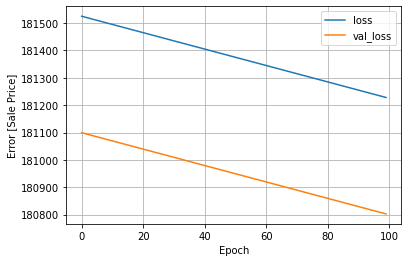

In [46]:
plot_loss(history)

In [47]:
test_results = {}

test_results['LotFrontage_model'] = LotFrontage_model.evaluate(
    X_val['LotFrontage'],
    y_val, verbose=0)

In [48]:
x = tf.linspace(0.0, 250, 251)
y = LotFrontage_model.predict(x)

In [49]:
def plot_horsepower(x, y):
    plt.scatter(X_train['LotFrontage'], y_train, label='Data')
    plt.plot(x, y, color='k', label='Predictions')
    plt.xlabel('LotFrontage')
    plt.ylabel('Sale Price')
    plt.legend()

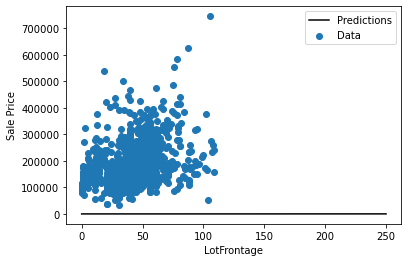

In [50]:
plot_horsepower(x,y)

In [52]:
linear_model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(units=1)
])

In [56]:
linear_model.predict(X_train[:10])

array([[-0.7351018 ],
       [ 1.605549  ],
       [-2.2714603 ],
       [-0.7737183 ],
       [-2.5939765 ],
       [-0.11368711],
       [ 1.5273879 ],
       [-1.667104  ],
       [ 1.0028346 ],
       [-1.0725462 ]], dtype=float32)

In [57]:
linear_model.layers[1].kernel.shape

TensorShape([79, 1])

In [58]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [61]:
history = linear_model.fit(
    X_train,
    y_train,
    epochs=1000,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

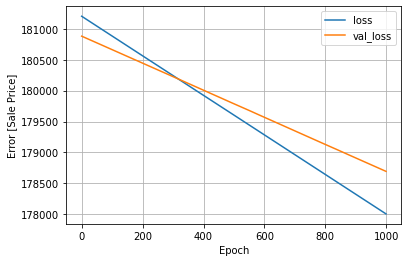

In [62]:
plot_loss(history)

In [64]:
test_results['linear_model'] = linear_model.evaluate(
    X_val, y_val, verbose=0)

In [71]:
def build_and_compile_model(normalizer):
    model = tf.keras.Sequential([
      normalizer,
      tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(1)
  ])
    model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
    return model

In [72]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 79)               159       
 n)                                                              
                                                                 
 dense_3 (Dense)             (None, 64)                5120      
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9,504
Trainable params: 9,345
Non-trainable params: 159
_________________________________________________________________


In [77]:
history = dnn_model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    verbose=0, epochs=1000)

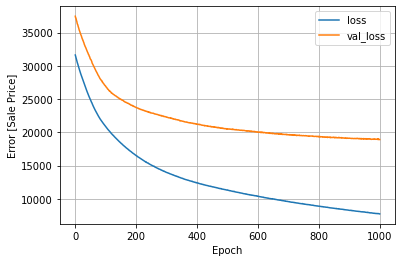

In [78]:
plot_loss(history)

In [79]:
test_results['dnn_model'] = dnn_model.evaluate(X_val, y_val, verbose=0)

In [80]:
pd.DataFrame(test_results, index=['Mean absolute error [SalePrice]']).T

,Mean absolute error [SalePrice]
LotFrontage_model,178540.171875
linear_model,175659.421875
dnn_model,21000.974609


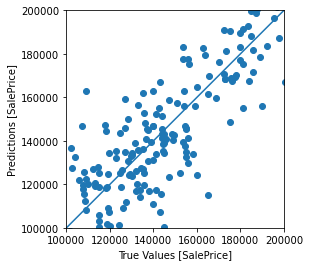

In [93]:
test_predictions = dnn_model.predict(X_val).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_val, test_predictions)
plt.xlabel('True Values [SalePrice]')
plt.ylabel('Predictions [SalePrice]')
lims = [100000, 200000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

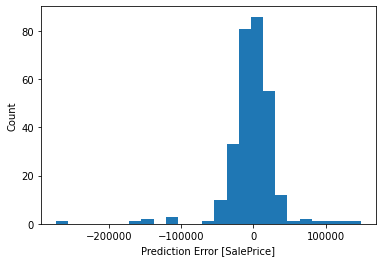

In [95]:
error = test_predictions - y_val
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [SalePrice]')
_ = plt.ylabel('Count')

In [96]:
dnn_model.save('dnn_model')

2021-11-27 14:09:19.737784: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: dnn_model/assets


In [101]:
test_predictions = dnn_model.predict(X_test[1:]).flatten()

ValueError: in user code:

    File "/Users/crameshb/.conda/envs/housing_prices/lib/python3.9/site-packages/keras/engine/training.py", line 1621, in predict_function  *
        return step_function(self, iterator)
    File "/Users/crameshb/.conda/envs/housing_prices/lib/python3.9/site-packages/keras/engine/training.py", line 1611, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/crameshb/.conda/envs/housing_prices/lib/python3.9/site-packages/keras/engine/training.py", line 1604, in run_step  **
        outputs = model.predict_step(data)
    File "/Users/crameshb/.conda/envs/housing_prices/lib/python3.9/site-packages/keras/engine/training.py", line 1572, in predict_step
        return self(x, training=False)
    File "/Users/crameshb/.conda/envs/housing_prices/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None

    ValueError: Exception encountered when calling layer "normalization" (type Normalization).
    
    Dimensions must be equal, but are 80 and 79 for '{{node sequential_3/normalization/sub}} = Sub[T=DT_FLOAT](sequential_3/Cast, sequential_3/normalization/sub/y)' with input shapes: [?,80], [1,79].
    
    Call arguments received:
      • inputs=tf.Tensor(shape=(None, 80), dtype=float32)
